In [2]:
# ==========================
# t-SNE
# ==========================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# --- Load and subsample data ---
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
random_state = 42

size = 5000
idx = np.random.choice(len(X), size=size, replace=False)
X_sub, y_sub = X[idx], y[idx]

# --- Scale ---
X_scaled = StandardScaler().fit_transform(X_sub)

In [ ]:
# --- Hyperparameter grid ---
r=2
perplexity_list = [2, 5, 10, 25, 50, 100]
learning_rate_list = [100, 200, 500]

results = []

for perplexity in perplexity_list:
    for lr in learning_rate_list:
        try:
            tsne = TSNE(
                n_components=r,
                perplexity=perplexity,
                learning_rate=lr,
                random_state=random_state,
                init='pca',
                max_iter=1000,
                verbose=0
            )
            Z = tsne.fit_transform(X_scaled)

            # --- Split ---
            Z_tr, Z_ts, y_tr, y_ts = train_test_split(
                Z, y_sub, test_size=0.2, random_state=random_state, stratify=y_sub
            )
            
            clf = LogisticRegression(max_iter=1000, n_jobs=-1)
            clf.fit(Z_tr, y_tr)
            acc = accuracy_score(y_ts, clf.predict(Z_ts))
            results.append((r, perplexity, lr, acc))
            print(f"r={r:>3}, perplexity={perplexity:>2}, lr={lr:>3}, Accuracy={acc:.4f}")
        except Exception as e:
            print(f"r={r:>3}, perplexity={perplexity:>2}, lr={lr:>3} -> skipped ({type(e).__name__})")

# --- Find best ---
best = max(results, key=lambda t: t[3])
print(f"\nBest: r={best[0]}, perplexity={best[1]}, lr={best[2]}, Accuracy={best[3]:.4f}")

r=  2, perplexity= 2, lr=100, Accuracy=0.6070
r=  2, perplexity= 2, lr=200, Accuracy=0.6030
r=  2, perplexity= 2, lr=500, Accuracy=0.6270
r=  2, perplexity= 5, lr=100, Accuracy=0.7800


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity= 5, lr=200, Accuracy=0.7790


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity= 5, lr=500, Accuracy=0.7520
r=  2, perplexity=10, lr=100, Accuracy=0.7530
r=  2, perplexity=10, lr=200, Accuracy=0.7570
r=  2, perplexity=10, lr=500, Accuracy=0.7350


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity=25, lr=100, Accuracy=0.7380


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity=25, lr=200, Accuracy=0.7380


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity=25, lr=500, Accuracy=0.7430
r=  2, perplexity=50, lr=100, Accuracy=0.6370
r=  2, perplexity=50, lr=200, Accuracy=0.6440


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r=  2, perplexity=50, lr=500, Accuracy=0.6790
r=  2, perplexity=100, lr=100, Accuracy=0.6690
r=  2, perplexity=100, lr=200, Accuracy=0.6690
r=  2, perplexity=100, lr=500, Accuracy=0.6880

Best: r=2, perplexity=5, lr=100, Accuracy=0.7800


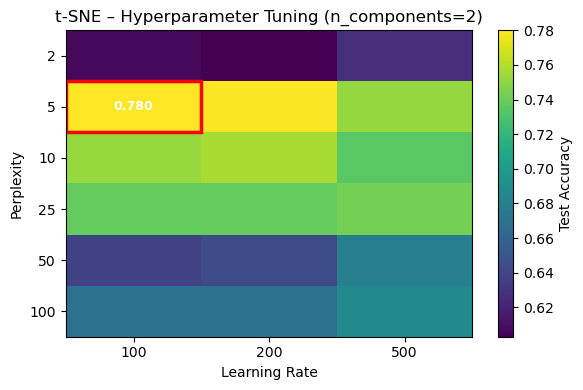

Best performance: perplexity=5, lr=100, Accuracy=0.7800


In [ ]:

# --- Heatmap visualization (fix r to best_r, vary perplexity and lr) ---
best_r = best[0]
p_vals = sorted(set(perplexity_list))
lr_vals = sorted(set(learning_rate_list))

acc_matrix = np.zeros((len(p_vals), len(lr_vals)))
for r, p, lr, acc in results:
    if r == best_r:
        i = p_vals.index(p)
        j = lr_vals.index(lr)
        acc_matrix[i, j] = acc

best_idx = np.unravel_index(np.argmax(acc_matrix), acc_matrix.shape)
best_p_idx, best_lr_idx = best_idx
best_acc = acc_matrix[best_p_idx, best_lr_idx]
best_p, best_lr = p_vals[best_p_idx], lr_vals[best_lr_idx]

plt.figure(figsize=(6,4))
plt.imshow(acc_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label="Test Accuracy")
plt.xticks(range(len(lr_vals)), lr_vals)
plt.yticks(range(len(p_vals)), p_vals)
plt.xlabel("Learning Rate")
plt.ylabel("Perplexity")
plt.title(f"t-SNE - Hyperparameter Tuning (n_components={best_r})")

ax = plt.gca()
rect = Rectangle(
    (best_lr_idx - 0.5, best_p_idx - 0.5),
    1, 1,
    linewidth=2.5,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)
plt.text(best_lr_idx, best_p_idx, f"{best_acc:.3f}",
         color='white', fontsize=9, ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("docs/tsne_hyperparam_heatmap.png", dpi=150)
plt.show()

print(f"Best performance: perplexity={best_p}, lr={best_lr}, Accuracy={best_acc:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


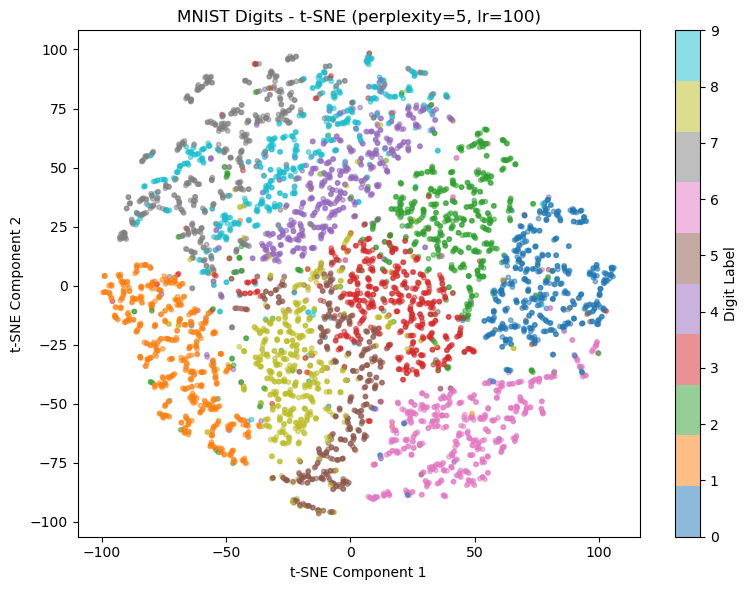

In [9]:
# --- 2D visualization using best perplexity and lr ---
tsne2 = TSNE(
    n_components=2,
    perplexity=best_p,
    learning_rate=best_lr,
    random_state=random_state,
    init='pca',
    max_iter=1000
)
Z2 = tsne2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sc = plt.scatter(Z2[:,0], Z2[:,1], c=y_sub, cmap="tab10", s=10, alpha=0.5)
plt.colorbar(sc, label="Digit Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title(f"MNIST Digits - t-SNE (perplexity={best_p}, lr={best_lr})")
plt.tight_layout()
plt.savefig("docs/tsne12_labeled_2d_tuned.png", dpi=150)
plt.show()
